In [ ]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

(86, 106)
(1, 130)
(94, 136)
(12, 94)
[array([ 89.09797539, 100.08292931]), array([ 78.47301547, 105.81019292]), array([102.21650522, 103.41047104]), array([  2.26769798, 128.93756039]), array([  0.26592051, 129.7683728 ]), array([  0.44297277, 130.18190039]), array([ 95.79601114, 136.09161381]), array([ 99.17742328, 135.79050441]), array([ 89.8071708 , 134.64362115]), array([11.97791004, 94.4253043 ]), array([ 3.96269093, 89.26231523]), array([16.31357202, 96.13940052])]
[89.09797538936922, 78.47301547371538, 102.21650522215356, 2.267697979836659, 0.26592050749219465, 0.44297276737159064, 95.79601114145329, 99.1774232832517, 89.80717079678968, 11.977910043870708, 3.962690933787531, 16.31357201712583] [100.08292931359907, 105.81019292403005, 103.41047103624484, 128.93756039282817, 129.76837279548303, 130.1819003925493, 136.09161380864543, 135.79050440693467, 134.64362115403782, 94.42530429518321, 89.26231523384207, 96.13940052287745]


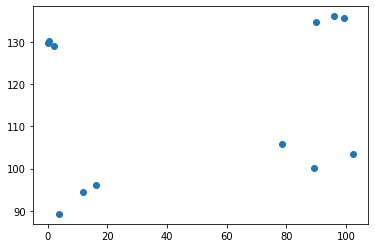

In [ ]:
radius = 150
number_of_cities = 12
n = 3
numberOfNeighbors = 4
points = []
lower_bound = 0
for i in range(numberOfNeighbors):
    center1 = (randint(0, radius), randint(0, radius))
    print(center1)
    dev1 = (randint(0, 10), randint(0, 10))
    points += [np.random.normal(center1, dev1) for i in range(n)]

print(points)
x = [0] * len(points)
y = [0] * len(points)
for i in range(len(points)):
    x[i] = points[i][0]
    y[i] = points[i][1]

print(x, y)
plt.scatter(x, y)
plt.show()

In [ ]:
from scipy.optimize import dual_annealing
from random import random
from numpy import exp
from copy import deepcopy

In [ ]:
def temperatureFunction(currentValue, step):
    return max(0, currentValue - 10*step)

def distance_between_cities(city1, city2):
    return sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def compute_travelling_salesperson(cities, coords):
    n = len(cities)
    route = 0
    for i in range(n - 1):
        route += distance_between_cities(coords[cities[i]], coords[cities[i+1]])
    route += distance_between_cities(coords[cities[n-1]], coords[cities[0]])
    return route

def move_combinatorial(route, a, b, c):
    n = len(route)
    city1 = randint(0, n - 1)
    city2 = randint(0, n - 1)
    route[city1], route[city2] = route[city2], route[city1]
    return route, n

def cooling_linear(t_max, alpha, step):
    return t_max / (1 + alpha * step)


def cooling_linear_additive(t_min, t_max, step, step_max):
    return t_min + (t_max - t_min) * ((step_max - step) / step_max)

def cooling_quadratic_m(t_min, alpha, step):
    return t_min / (1 + alpha * step**2)

def annealing(state, swap_function, objective_function, number_of_elements_to_move, coords, step_max, alpha, min_temperature, max_temperature):
    current_energy = objective_function(state, coords)
    best_energy = current_energy
    best_state = deepcopy(state)
    temperature = max_temperature
    step = 0
    accept = 0
    while step < step_max and temperature >= min_temperature: 
        new_state, _ = deepcopy(swap_function(state, number_of_elements_to_move, current_energy, coords))
        new_energy = objective_function(new_state, coords)
        delta = new_energy - current_energy
        if temperature != 0:
            if random() < exp( -delta / temperature):
                current_energy = new_energy
                current_state = deepcopy(new_state)
                accept += 1
        
        if new_energy < best_energy:
            best_energy = new_energy
            best_state = deepcopy(new_state)
        
        # temperature = cooling_linear_additive(min_temperature, max_temperature, step, step_max)
        temperature = cooling_quadratic_m(min_temperature, alpha, step)
        step += 1
    print(f"ended on step = {step} and temperature = {temperature}")
    return best_energy, best_state

In [ ]:
from random import shuffle

In [ ]:
def plotTSP(paths, points, num_iters=1):

    # Unpack the primary TSP path and transform it into a list of ordered 
    # coordinates

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])
    
    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]), 
                    head_width = a_scale, color = 'r', 
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(0, max(x)*1.1)
    plt.ylim(0, max(y)*1.1)
    plt.show()

691.1193347682989
ended on step = 100000 and temperature = 0.0


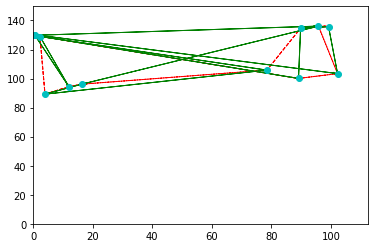

303.79027474061365 [4, 0, 2, 6, 7, 8, 1, 11, 9, 10, 3, 5]


In [ ]:
route = [i for i in range(number_of_cities)]
shuffle(route)
city_list = list(zip(x, y))
print(compute_travelling_salesperson(route, city_list))
paths = []
paths.append(route)
number_of_elems = 1
step_max = 100000
alpha = 0.8
min_temperature = 0
max_temperature = 10000
be, br = annealing(route, move_combinatorial, compute_travelling_salesperson, number_of_elems, points, step_max, alpha, min_temperature, max_temperature)
paths.append(br)
plotTSP(paths, city_list, 2)
print(be, br)

Proces optymalizacji jest lepszy dla chłodzenia funkcją kwadratową.

# **Obraz binarny**

In [ ]:
def get_neighbors(neighborhood):
    if neighborhood == 4:
        return [(1, 0), (-1, 0), (0, 1), (0, -1)]
    elif neighborhood == 8:
        return [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]
    elif neighborhood == 12:
        return [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1), (2, 0), (-2, 0), (0, 2), (0, -2)]
    elif neighborhood == 16:
        return [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1), (2, 0), (-2, 0), (0, 2), (0, -2), (2, 2), (-2, 2), (2, -2), (-2, -2)]

def elem_in_grid(grid, row, column):
    n = len(grid)
    return 0 <= row < n and 0 <= column < n

def energy_function(grid, neighborhood):
    n = len(grid)
    neighbors = get_neighbors(neighborhood)
    value = 0
    for i in range(n):
        for j in range(n):
            if grid[i][j] == 1:
                counter = 0
                for neighbor in neighbors:
                    if elem_in_grid(grid, i + neighbor[0], j + neighbor[1]):
                        counter += grid[ i + neighbor[0] ][ j + neighbor[1] ]

                value += counter
    return value  

def energy_of_element(grid, row, column, neighborhood):
    neighbors = get_neighbors(neighborhood)
    n = len(grid)
    counter = 0
    for neighbor in neighbors:
        if elem_in_grid(grid, row + neighbor[0], column + neighbor[1]):
            counter += grid[ row + neighbor[0] ][ column + neighbor[1] ]
    return counter

def generate_binary_grid(n, density):
    grid = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if random() < density:
                grid[i][j] = 1
    return grid

def update_objective(grid, objective, row1, col1, row2, col2, neighborhood):
    neighbors = get_neighbors(neighborhood)
    counter1 = 0
    counter2 = 0
    for neighbor in neighbors:
        if elem_in_grid(grid, row1 + neighbor[0], col1 + neighbor[1]):
            counter1 += energy_of_element(grid, row1 + neighbor[0], col1 + neighbor[1], neighborhood)
        if elem_in_grid(grid, row2 + neighbor[0], col2 + neighbor[1]):
            counter2 += energy_of_element(grid, row2 + neighbor[0], col2 + neighbor[1], neighborhood)
    objective -= counter1 + counter2

    grid[row1][col1], grid[row2][col2] = grid[row2][col2], grid[row1][col1]

    counter1 = 0
    counter2 = 0
    for neighbor in neighbors:
        if elem_in_grid(grid, row1 + neighbor[0], col1 + neighbor[1]):
            counter1 += energy_of_element(grid, row1 + neighbor[0], col1 + neighbor[1], neighborhood)
        if elem_in_grid(grid, row2 + neighbor[0], col2 + neighbor[1]):
            counter2 += energy_of_element(grid, row2 + neighbor[0], col2 + neighbor[1], neighborhood)
    objective += counter1 + counter2
    return grid, objective


def move_elements(grid, number_of_elements, objective, neighborhood):
    n = len(grid)
    for i in range(number_of_elements):
        (row1, col1) = (randint(0, n-1), randint(0, n-1))
        (row2, col2) = (randint(0, n-1), randint(0, n-1))
        while grid[row1][col1] == grid[row2][col2]:
            (row1, col1) = (randint(0, n-1), randint(0, n-1))
            (row2, col2) = (randint(0, n-1), randint(0, n-1))
        grid, objective = update_objective(grid, objective, row1, col1, row2, col2, neighborhood)
    return grid, objective

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot
import numpy as np

In [ ]:
def visualize_grid(zvals):
    # make a color map of fixed colors
    cmap = mpl.colors.ListedColormap(['white','black'])
    bounds=[0, 0, 1, 1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    # tell imshow about color map so that only set colors are used
    img = pyplot.imshow(zvals,interpolation='nearest',
                    cmap = cmap,norm=norm)

    # make a color bar
    pyplot.colorbar(img,cmap=cmap,
                norm=norm,boundaries=bounds,ticks=[0, 1])

    pyplot.show()

In [ ]:
n = 100
density = 0.3
neighborhood = 8
number_of_elements_to_move = 3
step = 1
accept = 0
step_max = 1000
alpha = 0.8
min_temperature = 0
max_temperature = 1000

7348.0


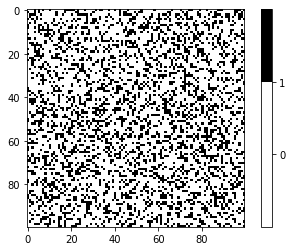

ended on step = 1000 and temperature = 0.0
7184.0


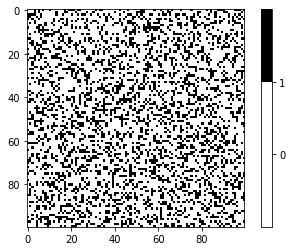

In [ ]:
grid = generate_binary_grid(n, density)
print(energy_function(grid, 8))
visualize_grid(grid)
be, bs = annealing(grid, move_elements, energy_function, number_of_elements_to_move, neighborhood, step_max, alpha, min_temperature, max_temperature)
print(be)
visualize_grid(bs)

Stany sąsiednie generuję poprzez losową zamianę czarnych i białych kwadracików. Im większe sąsiedztwo tym trudniej jest zminimalizować wybraną funkcję energii. Funkcja sąsiedztwa to suma ilości sąsiadów dla każdego punktu.

# **Sudoku**

In [ ]:
def read_grid(filename, size):
    grid = np.zeros((size, size), dtype=np.int8)
    can_move = np.ones((size, size), dtype=bool)
    with open(filename, encoding="utf-8") as f:
        for i in range(size):
            row = f.readline().split(' ')
            for j in range(size):
                if row[j][:1] != "x":
                    grid[i, j] = int(row[j])
                    can_move[i, j] = False
    return grid, can_move

In [ ]:
# grid, can_move = read_grid("/content/sample_data/sudoku.txt", 9)
grid, can_move = read_grid("/content/sample_data/sudoku_input.txt", 9)
print(grid)
print(can_move)

FileNotFoundError: ignored

In [ ]:
def cost_function(grid):
    n = len(grid)
    n_sqrt = int(sqrt(n))
    value = 0
    for i in range(n):
        for val in range(1, n+1):
            value += n - len(np.unique(grid[:, i]))
            value += n - len(np.unique(grid[i, :]))
    
    for i in range(0, n, n_sqrt):
        for j in range(0, n, n_sqrt):
            square = np.zeros((1, n))
            for k in range(0, n_sqrt):
                for l in range(0, n_sqrt):
                    square[:, k*n_sqrt + l] = grid[i + k, j + l]
            for val in range(1, n+1):
                value += n - len(np.unique(square))
    return value

def swap_function(grid, can_move, number_of_elements_to_move):
    n = len(grid)
    n_sqrt = int(sqrt(n))
    for i in range(number_of_elements_to_move):
        which_box = (randint(0, n_sqrt-1), randint(0, n_sqrt-1))
        (start_row, start_col) = (which_box[0] * n_sqrt, which_box[1] * n_sqrt) 
        (row1, col1) = (randint(0, n_sqrt-1), randint(0, n_sqrt-1))
        (row2, col2) = (randint(0, n_sqrt-1), randint(0, n_sqrt-1))
        while not (can_move[row1 + start_row, col1 + start_col] or can_move[start_row + row2, start_col + col2]):
            (row1, col1) = (randint(0, n_sqrt-1), randint(0, n_sqrt-1))
            (row2, col2) = (randint(0, n_sqrt-1), randint(0, n_sqrt-1))
        
        grid[row1 + start_row, col1 + start_col], grid[start_row + row2, start_col + col2] = grid[start_row + row2, start_col + col2], grid[row1 + start_row, col1 + start_col]
    return grid

def fill_grid(grid, can_move):
    n = len(grid)
    n_sqrt = int(sqrt(n))
    for i in range(0, n, n_sqrt):
        for j in range(0, n, n_sqrt):
            box = grid[i:i+n_sqrt, j:j+n_sqrt]
            for k in range(i,i+n_sqrt):
                for l in range(j,j+n_sqrt):
                    for val in range(1, n+1):
                        if val not in box:
                            grid[k, l] = val
                            break
            
    return grid

In [ ]:
def annealing(state, swap_function, objective_function, number_of_elements_to_move, can_move, step_max, alpha, temperature, min_temperature, max_temperature):
    current_energy = objective_function(state)
    current_state = deepcopy(state)
    best_energy = current_energy
    best_state = deepcopy(state)
    step = 0
    accept = 0
    while step < step_max and temperature >= min_temperature: 
        new_state = swap_function(current_state, can_move, number_of_elements_to_move)
        new_energy = objective_function(new_state)
        delta = new_energy - current_energy
        if random() < exp( -delta / temperature):
            current_energy = new_energy
            current_state = deepcopy(new_state)
            accept += 1
        
        if new_energy < best_energy:
            best_energy = new_energy
            best_state = deepcopy(new_state)
        
        temperature = cooling_linear(max_temperature, alpha, step)
        step += 1
    
    return best_energy, best_state

In [ ]:
start_state = fill_grid(grid, can_move)
print(cost_function(start_state))
print(start_state)
number_of_elements_to_move = 3
step_max = 10000
alpha = 0.3
temperature = 4000
min_temperature = 0
max_temperature = 10000
be, bs = annealing(start_state, swap_function, cost_function, number_of_elements_to_move, can_move, step_max, 
                   alpha, temperature, min_temperature, max_temperature)
print(be)
print(bs)

NameError: ignored

Stan początkowy tworzę poprzez zapełnienie planszy tak aby każdy mały kwadrat miał tylko unikalne cyfry. Stany sąsiednie generuje tak, że wybieram z określonego małego kwadratu (3x3) dwie cyfry które zamieniam miejscami. Dzięki temu nie psuję reguły, że w każdym małym kwadracie musi być tylko jedno wystąpienie cyfry, a daję szansę na ulepszenie rozwiązania. Oczywiście, im mniej pustych pól na wejściu tym łatwiej algorytmowi znaleźć poprawne rozwiązanie. Niestety nie dla każdej konfiguracji jest zawsze w stanie znaleźć rozwiązanie.